# Explanatory Students' Academic Performance
## by Ahmed Fathi

## Investigation Overview
> Factors Affecting Success in School

## Dataset Overview

&nbsp;&nbsp;This is an educational data set which is collected from learning management system (LMS) called Kalboard 360. Kalboard 360 is a multi-agent LMS, which has been designed to facilitate learning through the use of leading-edge technology. Such system provides users with a synchronous access to educational resources from any device with Internet connection. <br>
&nbsp;&nbsp;The data is collected using a learner activity tracker tool, which called experience API (xAPI). The xAPI is a component of the training and learning architecture (TLA) that enables to monitor learning progress and learner’s actions like reading an article or watching a training video. The experience API helps the learning activity providers to determine the learner, activity and objects that describe a learning experience.
The dataset consists of 480 student records and 16 features.

&nbsp;&nbsp;The features are classified into three major categories:
1) Demographic features such as gender and nationality. <br>
2) Academic background features such as educational stage, grade Level and section. <br>
3) Behavioral features such as raised hand on class, opening resources, answering survey by parents, and school satisfaction.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
performance = pd.read_csv("Students' Academic Performance Dataset.csv")
performance

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


## (Visualization 1)

&nbsp;&nbsp;Form the violinplot the **fathers** view announcement **23 times** -approximately- in the mean, but the **mothers** view the announcement **50 time** in the mean... which is twice the mean  of parents.

Father    283
Mum       197
Name: Relation, dtype: int64


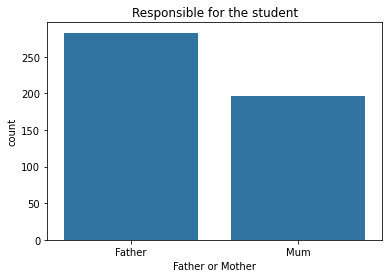

In [3]:
# find the numbers each class in the dataset
print(performance.Relation.value_counts())

# visualize the Class column
sb.countplot(data = performance, x = "Relation", color = sb.color_palette()[0])
plt.title('Responsible for the student')
plt.xlabel('Father or Mother');

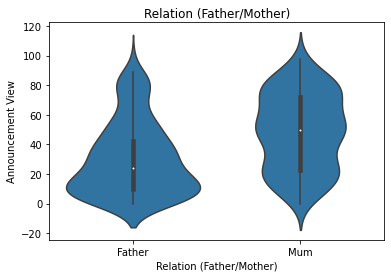

In [4]:
# visualize the relationship between announcement view and relation(Responsible for the student from the parents)
sb.violinplot(data = performance, x = 'Relation' , y = 'AnnouncementsView', color = sb.color_palette()[0])

plt.title('Relation (Father/Mother)')
plt.xlabel('Relation (Father/Mother)')
plt.ylabel('Announcement View');

## (Visualization 2)

&nbsp;&nbsp;The heatmap show the stuednt absence under 7 days in the semester the parent is satisfied, and it is normal thing. on the other hand, when the student absence above 7 days in the semester the parent get bad, and also it is normal thing. <br>
&nbsp;&nbsp;But I wonder about the two section of "Bad & Under-7" and "Good & Above-7", So, I will visualize the heatmap one more time in the multivariate section in below... but I will add the 'Relation' column to the figure to get more understand about this point.

In [5]:
# put the data ('StudentAbsenceDays' & 'ParentschoolSatisfaction') in desirable format - a DataFram
parents_absence = performance.groupby(['StudentAbsenceDays', 'ParentschoolSatisfaction']).size()


parents_absence = parents_absence.reset_index(name = 'count')
parents_absence = parents_absence.pivot(index = 'StudentAbsenceDays', columns = 'ParentschoolSatisfaction', 
                                        values = 'count')

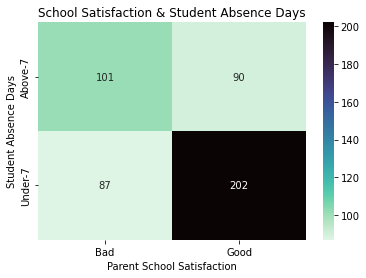

In [6]:
# plot teh heatmap
sb.heatmap(parents_absence, annot = True, fmt = 'd', cmap = 'mako_r')

plt.title('School Satisfaction & Student Absence Days')
plt.xlabel('Parent School Satisfaction')
plt.ylabel('Student Absence Days');

From the visualization... The Relation which is resplsaple of parents (Father or Mother) affect on the state of the students which affects the parents’ evaluation of the school

In [7]:
# put the data ('ParentschoolSatisfaction' & 'Relation') in desirable format - a DataFram

parents_absence_relation = performance.groupby(['Relation', 'ParentschoolSatisfaction']).size()


parents_absence_relation = parents_absence_relation.reset_index(
                                    name = 'StudentAbsenceDays')
parents_absence_relation = parents_absence_relation.pivot(index = 'Relation', columns = 'ParentschoolSatisfaction', 
                                                          values = 'StudentAbsenceDays')

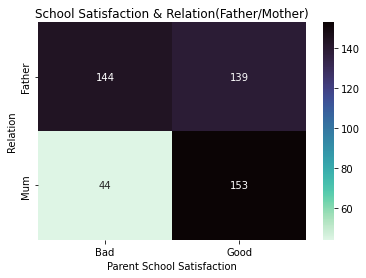

In [8]:
# plot heatmap
sb.heatmap(parents_absence_relation, annot = True, fmt = 'd', cmap = 'mako_r')

plt.title('School Satisfaction & Relation(Father/Mother)')
plt.xlabel('Parent School Satisfaction')
plt.ylabel('Relation');

## (Visualization 3)

The absent days of the student affect on the satisfication of the parent about the school.

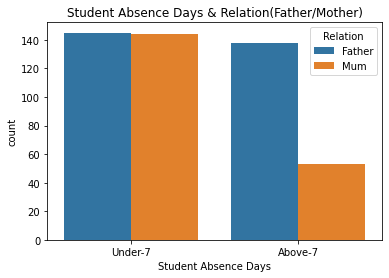

In [9]:
# Visualze Student Absence Days and Relation
sb.countplot(data = performance, x ='StudentAbsenceDays', hue = 'Relation')

plt.title('Student Absence Days & Relation(Father/Mother)')
plt.xlabel('Student Absence Days');

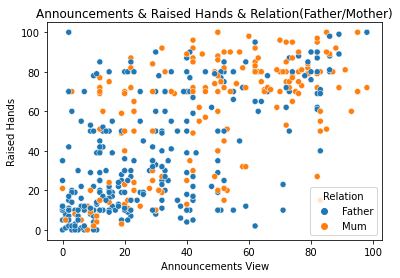

In [10]:
sb.scatterplot(data = performance, x = 'AnnouncementsView', y = 'raisedhands', hue = 'Relation')

plt.title('Announcements & Raised Hands & Relation(Father/Mother)')
plt.xlabel('Announcements View')
plt.ylabel('Raised Hands');